In [1]:
import sys
import os
from pathlib import Path
module_path = os.path.abspath(os.path.join('../')) 
sys.path.insert(0, module_path)

import katspace as ks
import katspace.core


from katspace.data import results_from_json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from katspace.core import RESULTS_DIR, DRIVE_DIR, DATA_DIR

from sklearn import linear_model
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_theme()

from functools import reduce

import operator

RESULTS_DIR_GB = Path(RESULTS_DIR, "predict-286-gutenberg")

Configuration file /Users/katrinrohrbacher/Meine Ablage/aspects-space-dev/katspace_config.json not found in /Users/katrinrohrbacher/Meine Ablage/aspects-space-dev/notebooks


In [2]:
def load_all_results_f_json(): 

    label2id = {"perceived_space": 0, "action_space": 1, "visual_space": 2, "descriptive_space":3, "no_space":4}
    id_matrix = np.eye(len(label2id), dtype = np.integer)
    
    gutenberg_df = pd.read_excel(Path(DATA_DIR, "20231216_1_gutenberg_master.xlsx"), index_col = 0)

    file_list = gutenberg_df.filename
    results_dic = {filename : results_from_json(filename, RESULTS_DIR_GB) for filename in file_list}

    num_chunks = 20
    results_dic = {filename : res for filename, res in results_dic.items() if (res != None) and (len(res) >= num_chunks)}

    file_list = results_dic.keys()

    space_type_ids_dict = {filename : [label2id[result["label"]] for result in results_dic[filename]] for filename in file_list}
    results_a_dict = {filename : id_matrix[space_type_ids_dict[filename]] for filename in file_list}

    return results_a_dict, file_list, gutenberg_df


def mk_time_df(df, exact = False, filename = None):
    time_df = pd.DataFrame()
    if not exact: 
        time_tf = np.pi * (df.index / df.index.max())
        time_df["time_tf"] = time_tf 
    elif exact: 
        time_tf = df[(filename, "time_tf_n")]
        time_df["time_tf"] = time_tf

    time_df["sin"] = np.sin(time_tf)
    time_df["cos"] = np.cos(time_tf)

    time_df["sin2"] = np.sin(2*time_tf)
    time_df["cos2"] = np.cos(2*time_tf)
    return time_df

In [3]:
label2id = {"perceived_space": 0, "action_space": 1, "visual_space": 2, "descriptive_space":3, "no_space":4}
id2label = dict(map(reversed, label2id.items()))
space_types = label2id.keys()
id_matrix = np.eye(len(label2id), dtype = np.integer)

# Single text

In [3]:
results_prozess = results_from_json("Franz_Kafka_-_Der_Prozeß.txt", RESULTS_DIR_GB)
results_verwandlung = results_from_json("Franz_Kafka_-_Die_Verwandlung.txt", RESULTS_DIR_GB)

In [4]:
label2id = {"perceived_space": 0, "action_space": 1, "visual_space": 2, "descriptive_space":3, "no_space":4}
id2label = dict(map(reversed, label2id.items()))
space_types = label2id.keys()

space_type_ids = [label2id[result["label"]] for result in results_prozess]
print(space_type_ids)
print(results_prozess)

[4, 4, 1, 4, 2, 1, 4, 1, 4, 1, 1, 0, 4, 1, 4, 4, 4, 4, 1, 2, 2, 4, 4, 2, 2, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 0, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 3, 1, 1, 2, 3, 2, 4, 4, 1, 4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 0, 4, 1, 1, 1, 1, 1, 4, 4, 1, 4, 0, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 3, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 2, 1, 1, 1, 4, 4, 1, 4, 4, 2, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 2, 1, 1, 4, 4, 4, 1, 1, 3, 4, 2, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 0, 2, 

In [ ]:
results_a = id_matrix[space_type_ids]
len(results_a)

In [ ]:
num_chunks = 20
action_space = [result[1] for result in results_a] 
action_space_results = list(map(sum, ks.data.chunker(action_space, num_chunks = num_chunks)))
action_space_results

20


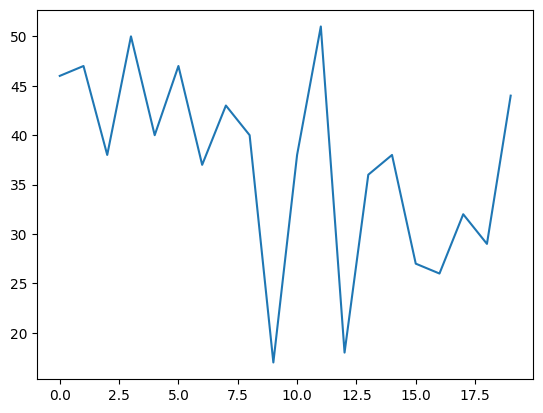

In [7]:
plt.plot(range(len(action_space_results)), action_space_results)
print(len(action_space_results))

In [8]:
nr_sents = len(action_space)
bin_sizes = ks.data.chunk_lengths(nr_sents, num_chunks = num_chunks)
sent_count = [sum(bin_sizes[0:n]) for n in range(len(bin_sizes))]

df = pd.DataFrame({"sent_count" : sent_count,     
    "action_space" : action_space_results,
    "bin_size" : bin_sizes
    })

#df["action_space_tf"] = df["action_space"] - df.action_space.mean()

df["time_tf"] = np.pi * (df["sent_count"] / df.sent_count.max())

df["sin"] = np.sin(df.time_tf)
df["cos"] = np.cos(df.time_tf)

df["sin2"] = np.sin(2*df.time_tf)
df["cos2"] = np.cos(2*df.time_tf)

df

,sent_count,action_space,bin_size,time_tf,sin,cos,sin2,cos2
0,0,46,182,0.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
1,182,47,182,0.165971,1.652100e-01,0.986258,3.258795e-01,0.945411
2,364,38,182,0.331942,3.258795e-01,0.945411,6.161803e-01,0.787605
3,546,50,182,0.497913,4.775928e-01,0.878581,8.392082e-01,0.543810
4,728,40,182,0.663884,6.161803e-01,0.787605,9.706136e-01,0.240644
5,910,47,182,0.829855,7.378333e-01,0.674983,9.960498e-01,-0.088796
6,1092,37,181,0.995826,8.392082e-01,0.543810,9.127400e-01,-0.408541
7,1273,43,181,1.160885,9.171560e-01,0.398528,7.310254e-01,-0.682350
8,1454,40,181,1.325944,9.701730e-01,0.242413,4.703660e-01,-0.882471
9,1635,17,181,1.491003,9.968182e-01,0.079709,1.589109e-01,-0.987293


# All texts

In [4]:
results_a_dict, file_list, gutenberg_df = load_all_results_f_json()

In [6]:
num_chunks = 20
chunk_length_dict = {filename : ks.data.chunk_lengths(len(results_a_dict[filename]), num_chunks) for filename in file_list}
results_chunked_dict = {filename : list(map(sum, ks.data.chunker(results_a_dict[filename], num_chunks = num_chunks))) for filename in file_list}

In [7]:
def chunk_data(results_a_dict, num_chunks = 20): 
    chunk_length_dict = {filename : ks.data.chunk_lengths(len(results_a_dict[filename]), num_chunks) for filename in file_list}
    results_chunked_dict = {filename : list(map(sum, ks.data.chunker(results_a_dict[filename], num_chunks = num_chunks))) for filename in file_list}
    return chunk_length_dict, results_chunked_dict

num_chunks = 20
chunk_length_dict, results_chunked_dict = chunk_data(results_a_dict) 

In [8]:
data_dict = {
    (filename, space_type) :
                            [result[label2id[space_type]] for result in results_chunked_dict[filename]]
                              for (filename, space_type) in itertools.product(file_list, space_types)
                              } | {
                                  (filename, "all_space") : [total - result[label2id["no_space"]] for result, total in 
                                                             zip(results_chunked_dict[filename], chunk_length_dict[filename])]
                                                            for filename in file_list
                              } | {
                                  (filename, "total") : chunk_length_dict[filename] for filename in file_list
                                  } 

for filename in file_list:
    bin_sizes = data_dict[(filename, "total")]
    sent_count = [sum(bin_sizes[0:n + 1]) for n in range(len(bin_sizes))]
    data_dict[(filename, "sent_count")] = sent_count

index = pd.MultiIndex.from_product([file_list, list(katspace.core.space_types_ext) + ["total", "sent_count"]])
results_df = pd.DataFrame(data_dict, columns = index)

results_df

Abraham_a_Sancta_Clara_-_Wunderlicher_Traum_von_einem_großen_Narrennest.txt  \
                                                               perceived_space   
0                                                   1                            
1                                                   0                            
2                                                   0                            
3                                                   0                            
4                                                   0                            
5                                                   2                            
6                                                   0                            
7                                                   1                            
8                                                   1                            
9                                                   5                            
10                                                  0                            
11                                                  0                            
12                                                  0                            
13                                                  1                            
14                                                  0                            
15                                                  0                            
16                                                  0                            
17                                                  2                            
18                                                  0                            
19                                                  0                            

                                                                         \
   action_space visual_space descriptive_space no_space all_space total   
0             1            0                 0       26         2    28   
1             2            0                 0       26         2    28   
2             1            0                 1       26         2    28   
3             2            0                 0       26         2    28   
4             4            0                 1       23         5    28   
5             0            0                 1       25         3    28   
6             1            0                 0       27         1    28   
7             1            0                 0       26         2    28   
8             2            0                 2       23         5    28   
9             4            0                 0       19         9    28   
10            1            0                 0       27         1    28   
11            6            0                 0       22         6    28   
12            1            0                 0       27         1    28   
13            5            0                 0       22         6    28   
14            0            0                 0       28         0    28   
15            1            0                 0       27         1    28   
16            1            0                 0       27         1    28   
17            0            0                 1       25         3    28   
18            3            0                 0       25         3    28   
19            2            0                 0       25         2    27   

              Abraham_a_Sancta_Clara_-_Fabeln_und_Parabeln.txt               \
   sent_count                                  perceived_space action_space   
0          28                                                2            3   
1          56                                                1            7   
2          84                                                0            6   
3         112                                                5            3   
4         140                                                2           

In [9]:
temp_dict = {}
for filename, space_type in results_df.columns: 
    col = space_type + "_n"   
    temp_dict[(filename, col)] = results_df.loc[:,(filename, space_type)] / results_df.loc[:,(filename, "total")]


normed_df = pd.DataFrame(temp_dict)
normed_df.sort_index(axis = "columns", inplace = True)
normed_df



A._Apel_und_F._Laun_-_Gespensterbuch._Drittes_Bändchen.txt              \
                                               action_space_n all_space_n   
0                                            0.121212            0.227273   
1                                            0.159091            0.325758   
2                                            0.181818            0.318182   
3                                            0.068182            0.121212   
4                                            0.143939            0.181818   
5                                            0.136364            0.250000   
6                                            0.128788            0.303030   
7                                            0.037879            0.121212   
8                                            0.121212            0.189394   
9                                            0.166667            0.333333   
10                                           0.106061            0.310606   
11                                           0.068182            0.106061   
12                                           0.030303            0.037879   
13                                           0.143939            0.257576   
14                                           0.213740            0.251908   
15                                           0.167939            0.297710   
16                                           0.160305            0.396947   
17                                           0.137405            0.312977   
18                                           0.137405            0.267176   
19                                           0.213740            0.419847   

                                                                          \
   descriptive_space_n no_space_n perceived_space_n sent_count_n total_n   
0             0.015152   0.772727          0.083333      1.00000     1.0   
1             0.030303   0.674242          0.121212      2.00000     1.0   
2             0.015152   0.681818          0.113636      3.00000     1.0   
3             0.015152   0.878788          0.037879      4.00000     1.0   
4             0.000000   0.818182          0.037879      5.00000     1.0   
5             0.000000   0.750000          0.106061      6.00000     1.0   
6             0.037879   0.696970          0.136364      7.00000     1.0   
7             0.000000   0.878788          0.083333      8.00000     1.0   
8             0.000000   0.810606          0.053030      9.00000     1.0   
9             0.053030   0.666667          0.106061     10.00000     1.0   
10            0.053030   0.689394          0.113636     11.00000     1.0   
11            0.007576   0.893939          0.030303     12.00000     1.0   
12            0.000000   0.962121          0.007576     13.00000     1.0   
13            0.007576   0.742424          0.083333     14.00000     1.0   
14            0.000000   0.748092          0.030534     15.10687     1.0   
15            0.038168   0.702290          0.091603     16.10687     1.0   
16            0.038168   0.603053          0.190840     17.10687     1.0   
17            0.030534   0.687023          0.129771     18.10687     1.0   
18            0.000000   0.732824          0.122137     19.10687     1.0   
19            0.015267   0.580153          0.167939     20.10687     1.0   

                  A._Apel_und_F._Laun_-_Gespensterbuch._Fünftes_Bändchen.txt  \
   visual_space_n                                             action_space_n   
0        0.007576                                           0.084746           
1        0.015152                                           0.101695           
2        0.007576                                           0.152542           
3        0.000000                                           0.203390           
4        0.000000                                           0.127119           
5        0.007576                                           0.101695       

In [10]:
results_df["Franz_Kafka_-_Der_Prozeß.txt"]

,perceived_space,action_space,visual_space,descriptive_space,no_space,all_space,total,sent_count
0,2,46,11,2,121,61,182,182
1,5,47,8,2,120,62,182,364
2,5,38,4,6,129,53,182,546
3,18,50,15,13,86,96,182,728
4,7,40,6,4,125,57,182,910
5,8,47,10,4,113,69,182,1092
6,14,37,9,8,113,68,181,1273
7,6,43,6,1,125,56,181,1454
8,9,40,9,5,118,63,181,1635
9,4,17,8,5,147,34,181,1816


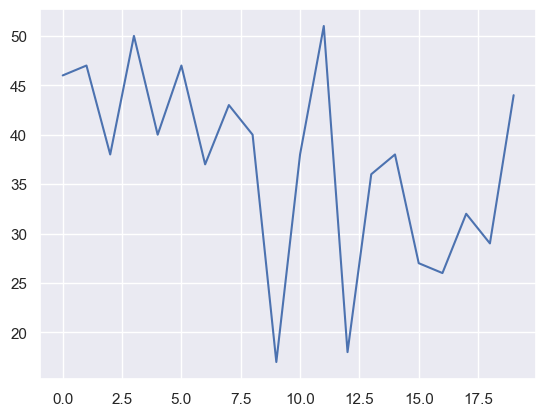

In [11]:
x = range(results_df.shape[0])
key = ("Franz_Kafka_-_Der_Prozeß.txt", "action_space")
y = results_df[key]

plt.plot(x, y)

In [12]:
time_df = mk_time_df(results_df)

def fit(normed_df, space_type, time_df = time_df): 
    x = pd.DataFrame()
    y = pd.Series()

    for filename in normed_df.columns.get_level_values(0).unique():
        x = pd.concat([x, time_df[['time_tf', "sin", "cos", "sin2", "cos2"]]], axis = 0)
        y = pd.concat([y, normed_df[(filename, space_type)]], axis = 0)
    
    # with statsmodels
    xx = sm.add_constant(x) # adding a constant
    time_tf = np.pi * np.arange(1,len(normed_df.index) + 1) / len(normed_df.index)
    time_tf = sm.add_constant(time_tf)
    
    model = sm.OLS(y, xx).fit()
    
    print_model = model.summary()
    print(print_model)
    return x, y, model

def predict(model, time_df = time_df): 
    time_df = sm.add_constant(time_df) # adding a constant
    predictions = model.predict(time_df) 
    return time_df["time_tf"], predictions

In [80]:
def as_latex(summary, title):
    '''Generate LaTeX Summary Table
    '''
    tables = summary.tables[:2]
    settings = summary.settings
    if title is not None:
        title = '\\caption*{' + title + '}'
    else:
        title = '\\caption*{}'

    simple_tables = _simple_tables(tables, settings)
    tab = [x.as_latex_tabular() for x in simple_tables]
    tab = '\n\n'.join(tab)

    out = '\\begin{table}', title, tab, '\\end{table}'
    out = '\n'.join(out)
    return out

def model_to_tex_file(model, title, filename):
    summary = model.summary2()
    summary.tables[0] = summary.tables[0].iloc[[0,3,4,5,6],:]
    latex_string = as_latex(summary, title)
    file = Path(DATA_DIR, filename)
    file.write_text(latex_string)

In [ ]:
x, y, model = fit(normed_df, "action_space_n")

x_pred, predictions = predict(model, time_df)

err = normed_df.loc[:,(slice(None), "action_space_n")].var(axis = 1)
mean = normed_df.loc[:,(slice(None), "action_space_n")].mean(axis = 1)

plt.scatter(x["time_tf"], y, label = "data", s = 1, color = "#c44e52")
plt.plot(x_pred, predictions, label = "model", color = "#dd8452")
plt.errorbar(x["time_tf"][0:20], mean, yerr=err, uplims= True, lolims= True, linestyle='none', label = "mean (variance)", color = "#9467bd")
plt.legend()
_ = plt.title("all_space")

In [ ]:
x, y, model = fit(normed_df, "perceived_space_n")

x_pred, predictions = predict(model, time_df)

err = normed_df.loc[:,(slice(None), "perceived_space_n")].var(axis = 1)
mean = normed_df.loc[:,(slice(None), "perceived_space_n")].mean(axis = 1)

plt.scatter(x["time_tf"], y, label = "data", s = 1, color = "#c44e52")
plt.plot(x_pred, predictions, label = "model", color = "#dd8452")
plt.errorbar(x["time_tf"][0:20], mean, yerr=err, uplims= True, lolims= True, linestyle='none', label = "mean (variance)", color = "#9467bd")
plt.legend()
_ = plt.title("perceived_space")